- 불순도가 증가한다 = 엔트로피가 증가한다
- 엔트로피가 낮은 데서 최대로 하는 방향으로 학습이 진행된다
- 결정트리(D-Tree) 단점 : 과적합이 일어나기 쉬움

# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다

각각의 독립변수에 대하여
- 범주형 : 각 범주에 따라
- 연속형 : 여러 개의 영역으로 임의로 나눔

나누어둔 영역들에 대하여 엔트로피/오분류율/지니계수를 가장 좋은 값으로 만드는 변수와 기준을 선택

### 엔트로피
- 직관적 정의 : 0 또는 1일 확률이 최소, 0.5일 확률이 최대가 되게 하는 함수

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

- 지니계수는 1에 가까울 수록 잘 분류

### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz # 결정트리 시각적으로 보여줌

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import os

In [16]:
# https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\graphviz-2.44.1-win32\Graphviz\bin'

In [2]:
iris = load_iris()

In [3]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
model_Tree = DecisionTreeClassifier( criterion='entropy')
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, 
                                                    random_state=11, stratify=iris['target'])

# 분류는 stratify=iris['target']

In [5]:
model_Tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# tree.dot이 만들어짐!!

export_graphviz(model_Tree, out_file='tree.dot', class_names=iris['target_names'], feature_names=iris['feature_names'])

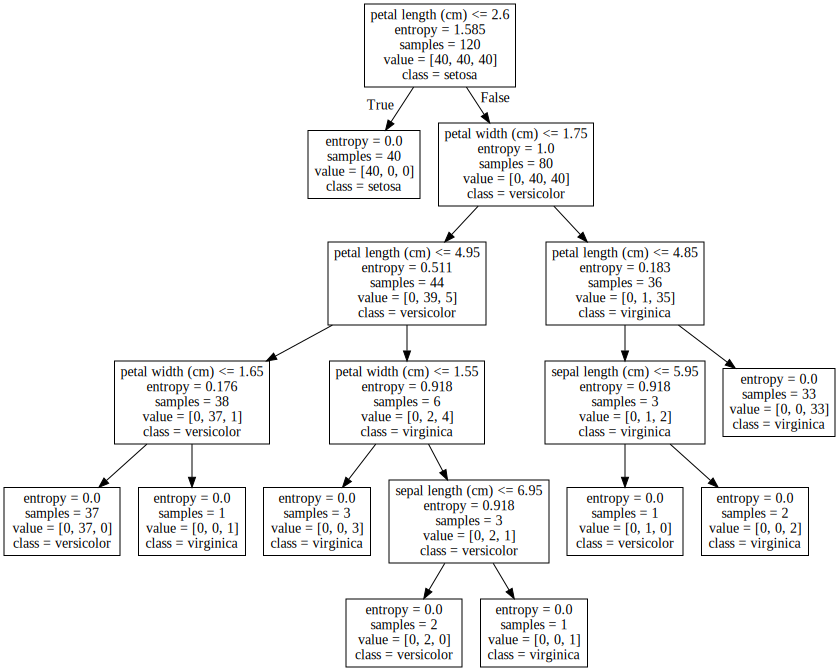

In [9]:
# with 문 쓰면 열면 바로 닫힘

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# depth를 안 주면 깊이에 대한 제한이 없음

In [18]:
# 과적합의 가능성이 있으므로 조심하자!!

model_Tree.score(x_test, y_test)

1.0

In [19]:
model_Tree.score(x_train, y_train)

1.0

- 특성데이터의 중요도

In [20]:
model_Tree.feature_importances_

array([0.02896901, 0.        , 0.65367701, 0.31735398])

In [21]:
import seaborn as sns

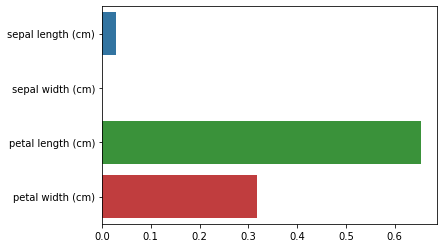

In [22]:
sns.barplot(x=model_Tree.feature_importances_, y=iris['feature_names'] )
plt.show()

# petal length가 가장 중요해서 상위에 위치

# 과적합을 확인해 보자 - validation_curve => 교차검증도 해줌

- 과적합에서 중요한건 depth

In [ ]:
validation_curve()

# 과적합이 어느시점에서 일어나는지 확인 가능

In [23]:
from sklearn.model_selection import validation_curve

In [24]:
pipe_tree = make_pipeline(DecisionTreeClassifier(criterion='entropy'))

In [25]:
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10] # 9개

In [28]:
train_score, test_score = validation_curve(estimator=pipe_tree, X=x_train, y=y_train, param_name='decisiontreeclassifier__max_depth',
                param_range=param_range, scoring='f1_macro', cv=5, verbose=1)

# estimator는 파이프라인으로 꼭하기 
# 원래라면 검증데이터셋으로 교차검증
# 다중 분류이기 때문에 scoring='f1_macro' 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [29]:
train_score # 교차검증한 점수

# 9개의 변수 각각의 5fold 교차검정 결과값

array([[0.94780197, 0.9582926 , 0.94759682, 0.9582926 , 0.95816993],
       [0.96874237, 0.9582926 , 0.96874237, 0.96868118, 0.95816993],
       [0.9791463 , 0.96868118, 0.98958079, 0.98958079, 0.9791463 ],
       [0.9791463 , 0.9791463 , 1.        , 1.        , 0.98958079],
       [1.        , 0.98958079, 1.        , 1.        , 0.98958079],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [30]:
# 9개 행의 각각의 평균값을 보면

train_score.mean(axis=1)

array([0.95403079, 0.96452569, 0.98122707, 0.98957468, 0.99583232,
       1.        , 1.        , 1.        , 1.        ])

In [31]:
test_score

array([[0.95816993, 0.91534392, 0.95816993, 0.87044534, 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.82222222, 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.91666667, 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.8745098 , 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.8745098 , 0.83333333],
       [0.95816993, 0.91534392, 0.95816993, 0.8745098 , 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.8745098 , 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.91666667, 0.8745098 ],
       [0.95816993, 0.91534392, 0.95816993, 0.8745098 , 0.8745098 ]])

In [32]:
test_score.mean(axis=1)

array([0.91532779, 0.90568316, 0.92457205, 0.91614068, 0.90790538,
       0.91614068, 0.91614068, 0.92457205, 0.91614068])

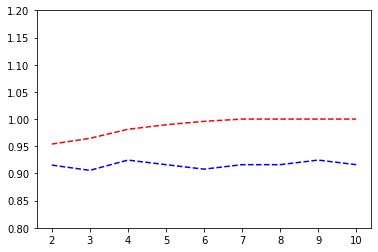

In [41]:
plt.ylim(0.8, 1.2)
plt.plot( param_range, train_score.mean(axis=1), 'r--')
plt.plot( param_range, test_score.mean(axis=1), 'b--')
plt.show()

### 4 이후로는 갭이 커지는 것을 볼 수 있기 때문에 과적합이라고 할 수 있음

# <연습문제>

### breast_cancel 의사결정나무 validation curve를 그리시오.

In [43]:
breast_cancel = load_breast_cancer()

In [44]:
breast_cancel

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [45]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancel['data'], breast_cancel['target'], test_size=0.2, 
                                                    random_state=11, stratify=breast_cancel['target'])

In [46]:
pipe_tree = make_pipeline(DecisionTreeClassifier(criterion='entropy'))
param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

In [47]:
train_score, test_score = validation_curve(estimator=pipe_tree, X=x_train, y=y_train, param_name='decisiontreeclassifier__max_depth',
                param_range=param_range, scoring='f1_macro', cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


In [51]:
pipe_tree.fit(x_train, y_train)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [53]:
pipe_tree.score(x_train, y_train)

1.0

In [54]:
pipe_tree.score(x_test, y_test)

0.9298245614035088

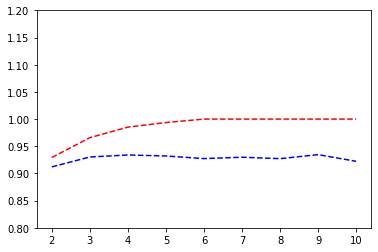

In [56]:
plt.ylim(0.8, 1.2)
plt.plot( param_range, train_score.mean(axis=1), 'r--')
plt.plot( param_range, test_score.mean(axis=1), 'b--')
plt.show()

### 2가 제일 적당하다